# Gunhoo Park - Homework 4
# USC ID: 8585425433
# Github user name: gunhoo

# 1.

Source: Same as homework 3

In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [5]:
# Source: https://archive.ics.uci.edu/dataset/366/activity+recognition+system+based+on+multisensor+data+fusion+arem
# F. Palumbo, C. Gallicchio, R. Pucci, and A. Micheli. "Activity Recognition system based on Multisensor data fusion (AReM)," UCI Machine Learning Repository, 2016. [Online]. Available: https://doi.org/10.24432/C5SS33.

In [6]:
training_set = pd.DataFrame()
testing_set = pd.DataFrame()

In [7]:
for j in range(1, 3):
    for i in range(1, 7):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending{j}/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = 'bending'+str(j)
        if i == 1 or i == 2:
            testing_set = pd.concat([testing_set, df])
        else:
            training_set = pd.concat([training_set, df])
file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending1/dataset7.csv'
df = pd.read_csv(file, skiprows=4)
df['activity'] = 'bending1'
training_set = pd.concat([training_set, df])

In [8]:
for j in ['cycling', 'lying', 'sitting', 'standing', 'walking']:
    for i in range(1, 16):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/{j}/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = j
        if i == 1 or i == 2 or i == 3:
            testing_set = pd.concat([testing_set, df])
        else:
            training_set = pd.concat([training_set, df])

In [9]:
training_set = training_set.rename(columns={'# Columns: time': 'time'})
testing_set = testing_set.rename(columns={'# Columns: time': 'time'})

In [10]:
training_set

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0         0      42.00       0.71      21.25       0.43      30.00       0.00   
1       250      41.50       0.50      20.25       1.48      31.25       1.09   
2       500      41.50       0.50      14.25       1.92      33.00       0.00   
3       750      40.75       0.83      15.75       0.43      33.00       0.00   
4      1000      40.00       0.71      20.00       2.74      32.75       0.43   
..      ...        ...        ...        ...        ...        ...        ...   
475  118750      34.50       6.18       9.00       3.56      12.67       4.19   
476  119000      25.75       6.02      13.75       2.05      16.00       1.58   
477  119250      31.50       3.35      10.25       5.12      16.25       2.95   
478  119500      33.75       2.77      14.00       3.24      13.75       0.43   
479  119750      37.00       1.41      18.25       3.70      11.00       4.32   

     activity  
0    bending1  
1    bending1  
2    bending1  
3    bending1  
4    bending1  
..        ...  
475   walking  
476   walking  
477   walking  
478   walking  
479   walking  

[33119 rows x 8 columns]

In [11]:
testing_set

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0         0      39.25       0.43      22.75       0.43      33.75       1.30   
1       250      39.25       0.43      23.00       0.00      33.00       0.00   
2       500      39.25       0.43      23.25       0.43      33.00       0.00   
3       750      39.50       0.50      23.00       0.71      33.00       0.00   
4      1000      39.50       0.50      24.00       0.00      33.00       0.00   
..      ...        ...        ...        ...        ...        ...        ...   
475  118750      36.00       2.45      17.00       5.10      20.50       0.87   
476  119000      34.33       1.89      15.00       2.45      17.00       2.12   
477  119250      33.00       7.35      14.60       3.14      13.00       5.70   
478  119500      31.67       1.25      11.00       6.16      19.25       2.17   
479  119750      30.75      10.21      11.75       1.09      18.50       3.20   

     activity  
0    bending1  
1    bending1  
2    bending1  
3    bending1  
4    bending1  
..        ...  
475   walking  
476   walking  
477   walking  
478   walking  
479   walking  

[9120 rows x 8 columns]

In [12]:
def extract_features(df):
    features = {}
    columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
    
    for i, col in enumerate(columns, start=1):
        df_t = pd.DataFrame(df[col].astype('float').describe()).T
        features[f'min_{i}'] = df_t['min'].iloc[0]
        features[f'max_{i}'] = df_t['max'].iloc[0]
        features[f'mean_{i}'] = df_t['mean'].iloc[0]
        features[f'median_{i}'] = df_t['50%'].iloc[0]
        features[f'std_{i}'] = df_t['std'].iloc[0]
        features[f'1st_quartile_{i}'] = df_t['25%'].iloc[0]
        features[f'3rd_quartile_{i}'] = df_t['75%'].iloc[0]
    return features

In [13]:
extracted_features = []
for i in range(1, 8):
    file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending1/dataset{i}.csv'
    df = pd.read_csv(file, skiprows=4)
    df['activity'] = 'bending1'
    features = extract_features(df)
    features['activity'] = 'bending1'
    extracted_features.append(features)

for i in range(1, 7):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending2/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = 'bending2'
        features = extract_features(df)
        features['activity'] = 'bending2'
        extracted_features.append(features)

for activity in ['cycling', 'lying', 'sitting', 'standing', 'walking']:
    for i in range(1, 16):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/{activity}/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = activity
        features = extract_features(df)
        features['activity'] = activity
        extracted_features.append(features)

In [14]:
features = pd.DataFrame(extracted_features)

In [15]:
features

min_1  max_1     mean_1  median_1     std_1  1st_quartile_1  \
0   37.25  45.00  40.624792     40.50  1.476967           39.25   
1   38.00  45.67  42.812812     42.50  1.435550           42.00   
2   35.00  47.40  43.954500     44.33  1.558835           43.00   
3   33.00  47.75  42.179812     43.50  3.670666           39.15   
4   33.00  45.75  41.678063     41.75  2.243490           41.33   
..    ...    ...        ...       ...       ...             ...   
83  19.50  45.33  33.586875     34.25  4.650935           30.25   
84  19.75  45.50  34.322750     35.25  4.752477           31.00   
85  19.50  46.00  34.546229     35.25  4.842294           31.25   
86  23.50  46.25  34.873229     35.25  4.531720           31.75   
87  19.25  44.00  34.473188     35.00  4.796705           31.25   

    3rd_quartile_1  min_2  max_2    mean_2  ...  1st_quartile_5  \
0          42.0000    0.0   1.30  0.358604  ...         33.0000   
1          43.6700    0.0   1.22  0.372437  ...         32.0000   
2          45.0000    0.0   1.70  0.426250  ...         35.3625   
3          45.0000    0.0   3.00  0.696042  ...         30.4575   
4          42.7500    0.0   2.83  0.535979  ...         28.4575   
..             ...    ...    ...       ...  ...             ...   
83         37.0000    0.0  14.67  4.576562  ...         13.7300   
84         38.0000    0.0  13.47  4.456333  ...         13.5000   
85         37.8125    0.0  12.47  4.371958  ...         14.0000   
86         38.2500    0.0  14.82  4.380583  ...         13.7500   
87         38.0000    0.0  13.86  4.359312  ...         13.7300   

    3rd_quartile_5  min_6  max_6    mean_6  median_6     std_6  \
0            36.00   0.00   1.92  0.570583      0.43  0.582915   
1            34.50   0.00   3.11  0.571083      0.43  0.601010   
2            36.50   0.00   1.79  0.493292      0.43  0.513506   
3            36.33   0.00   2.18  0.613521      0.50  0.524317   
4            31.25   0.00   1.79  0.383292      0.43  0.389164   
..             ...    ...    ...       ...       ...       ...   
83           18.25   0.00   8.32  3.259729      3.11  1.640243   
84           17.75   0.00   9.67  3.432563      3.20  1.732727   
85           17.75   0.00  10.00  3.338125      3.08  1.656742   
86           18.00   0.00   9.51  3.424646      3.27  1.690960   
87           17.75   0.43   9.00  3.340458      3.09  1.699114   

    1st_quartile_6  3rd_quartile_6  activity  
0           0.0000          1.3000  bending1  
1           0.0000          1.3000  bending1  
2           0.0000          0.9400  bending1  
3           0.0000          1.0000  bending1  
4           0.0000          0.5000  bending1  
..             ...             ...       ...  
83          2.0500          4.3225   walking  
84          2.1575          4.5650   walking  
85          2.1600          4.3350   walking  
86          2.1700          4.5000   walking  
87          2.1200          4.3750   walking  

[88 rows x 43 columns]

In [16]:
features_df = pd.DataFrame(extracted_features)
std_dev = features_df.drop(columns=['activity']).std()

In [17]:
std_dev

min_1             9.569975
max_1             4.394362
mean_1            5.335718
median_1          5.440054
std_1             1.772153
1st_quartile_1    6.153590
3rd_quartile_1    5.138925
min_2             0.000000
max_2             5.062729
mean_2            1.574164
median_2          1.412244
std_2             0.884105
1st_quartile_2    0.946386
3rd_quartile_2    2.125266
min_3             2.956462
max_3             4.875137
mean_3            4.008380
median_3          4.036396
std_3             0.946710
1st_quartile_3    4.220658
3rd_quartile_3    4.171628
min_4             0.000000
max_4             2.183625
mean_4            1.166114
median_4          1.145586
std_4             0.458242
1st_quartile_4    0.843620
3rd_quartile_4    1.552504
min_5             6.124001
max_5             5.741238
mean_5            5.675593
median_5          5.813782
std_5             1.024898
1st_quartile_5    6.096465
3rd_quartile_5    5.531720
min_6             0.045838
max_6             2.518921
m

In [18]:
# Source: https://docs.scipy.org/doc/scipy/reference/stats.html
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
from scipy.stats import bootstrap

In [19]:
ci_results = []

In [20]:
for col in features_df.columns:
    if np.issubdtype(features_df[col].dtype, np.number):
        res = bootstrap((features_df[col].values,), np.std, confidence_level=0.90, method='basic')
        ci_results.append((col, res.confidence_interval.low, res.confidence_interval.high))

In [21]:
ci_df = pd.DataFrame(ci_results, columns=['Feature','Lower Bound', 'Upper Bound'])

In [22]:
ci_df

Feature  Lower Bound  Upper Bound
0            min_1     8.310885    10.796463
1            max_1     3.467113     5.413056
2           mean_1     4.761452     5.919403
3         median_1     4.853468     6.060129
4            std_1     1.588032     1.956613
5   1st_quartile_1     5.625608     6.690313
6   3rd_quartile_1     4.394161     5.901860
7            min_2     0.000000     0.000000
8            max_2     4.692499     5.476902
9           mean_2     1.434504     1.740862
10        median_2     1.272030     1.582114
11           std_2     0.821204     0.958618
12  1st_quartile_2     0.851189     1.055674
13  3rd_quartile_2     1.943225     2.343967
14           min_3     2.788810     3.140114
15           max_3     4.252395     5.553893
16          mean_3     3.502041     4.582536
17        median_3     3.517794     4.619195
18           std_3     0.767617     1.122139
19  1st_quartile_3     3.713862     4.788886
20  3rd_quartile_3     3.636317     4.775755
21           min_4     0.000000     0.000000
22           max_4     1.995628     2.376664
23          mean_4     1.102723     1.250100
24        median_4     1.081731     1.227440
25           std_4     0.427010     0.492701
26  1st_quartile_4     0.790955     0.906594
27  3rd_quartile_4     1.469754     1.660796
28           min_5     4.675557     7.746417
29           max_5     4.899827     6.673064
30          mean_5     4.603867     6.897111
31        median_5     4.687521     7.040111
32           std_5     0.827456     1.227837
33  1st_quartile_5     4.974742     7.367142
34  3rd_quartile_5     4.503817     6.657691
35           min_6     0.013125     0.091154
36           max_6     2.261371     2.772805
37          mean_6     1.088595     1.242380
38        median_6     1.019192     1.171840
39           std_6     0.487907     0.551964
40  1st_quartile_6     0.705736     0.821720
41  3rd_quartile_6     1.437377     1.635428

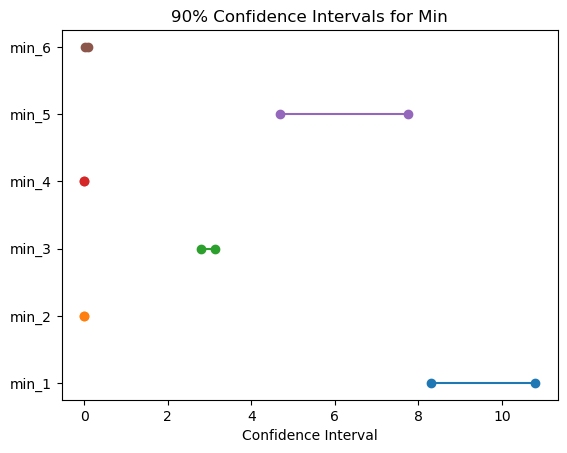

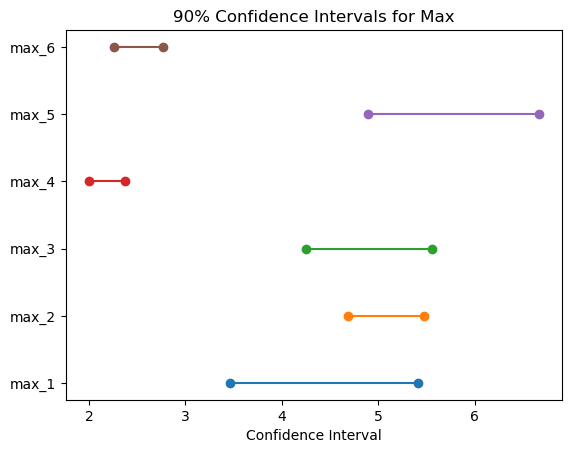

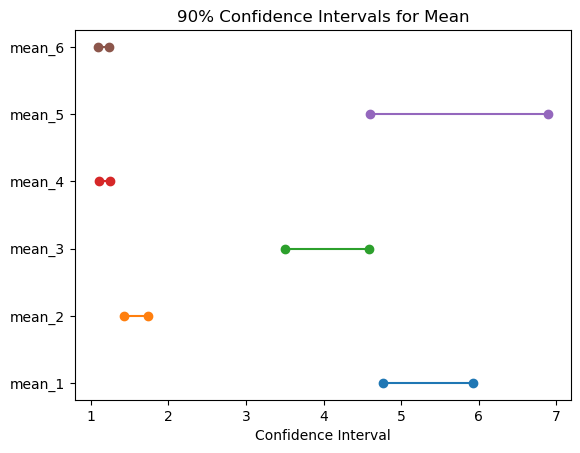

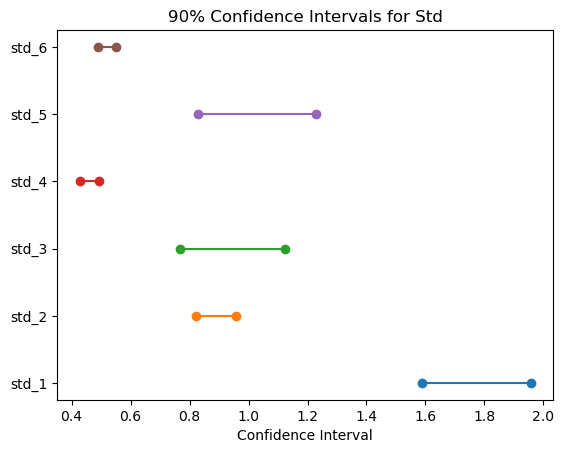

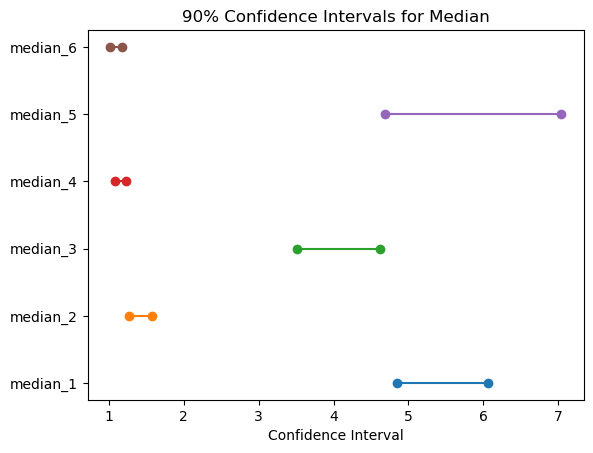

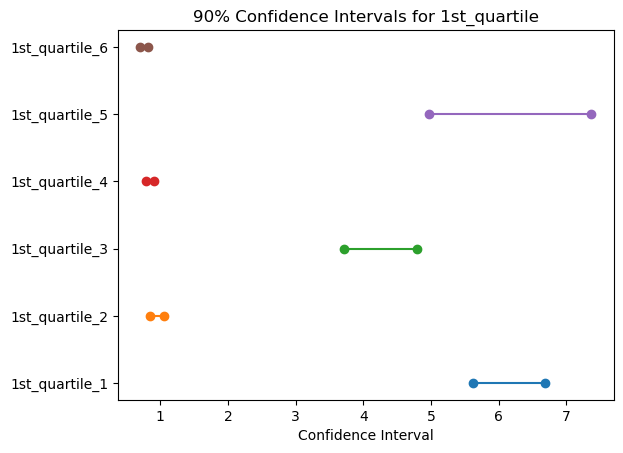

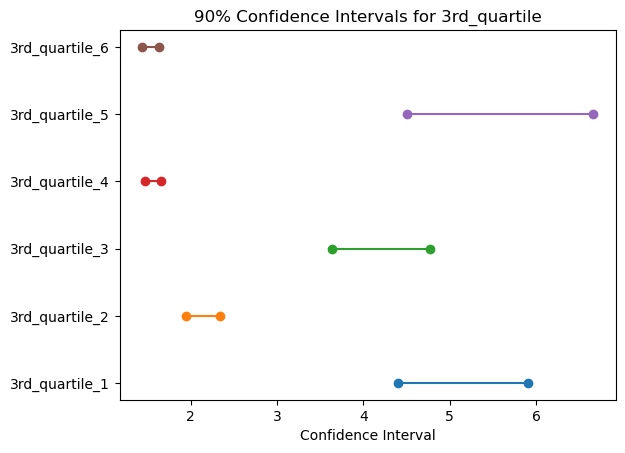

In [23]:
def plot_ci(feature_type):
    feature = ci_df[ci_df['Feature'].str.contains(feature_type)]
    for i, row in feature.iterrows():
        plt.plot([row['Lower Bound'], row['Upper Bound']],[row['Feature'], row['Feature']], marker='o')
    plt.yticks(np.arange(len(feature)), feature['Feature'])
    plt.xlabel('Confidence Interval')
    plt.title(f'90% Confidence Intervals for {feature_type.capitalize()}')
    plt.show()

# Min
plot_ci('min')
# Max
plot_ci('max')
# Mean
plot_ci('mean')
# Std
plot_ci('std')
# Median
plot_ci('median')
# 1st_quartile
plot_ci('1st_quartile')
# 3rd_quartile
plot_ci('3rd_quartile')

# 2. Time Series Classification Part 2: Binary and Multiclass Classification

## (a) Binary Classification Using Logistic Regression

### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1,2 and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [27]:
classes_dict = {'bending1': 0, 'bending2': 1, 'cycling': 2, 'lying': 3, 'sitting': 4, 'standing': 5, 'walking': 6}
rev_classes_dict = {0: 'bending1', 1: 'bending2', 2: 'cycling', 3: 'lying', 4: 'sitting', 5: 'standing', 6: 'walking'}
binary_class_dict = {1: 'bending', 0: 'non-bending'}

In [28]:
files = {}
for folder in os.listdir('../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/'):
    if 'pdf' in folder:
            continue
    for file in os.listdir('../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/'+folder):
        key = '../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/'+ folder + '/' + file
        files[key] = pd.read_csv(key, skiprows = 4, usecols = [0, 1, 2, 3, 4, 5, 6])
        del files[key][files[key].columns[0]]

In [29]:
train_data_map = {}
test_data_map = {}
for folder in os.listdir('../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/'):
    if 'pdf' in folder:
            continue
    for file in os.listdir('../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/'+folder):
        file_name = '../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/' + folder + '/' + file
        if (folder == 'bending1' or folder == 'bending2'):
            if file == 'dataset1.csv' or file == 'dataset2.csv':
                test_data_map[file_name] = files[file_name]
            else:
                train_data_map[file_name] = files[file_name]
        else:
            if file == 'dataset1.csv' or file == 'dataset2.csv' or file == 'dataset3.csv':
                test_data_map[file_name] = files[file_name]
            else:
                train_data_map[file_name] = files[file_name]

print("Total Train Dataset Files: ", len(train_data_map))
print("Total Test Dataset Files: ", len(test_data_map))

Total Train Dataset Files:  69
Total Test Dataset Files:  19


In [30]:
def train_test_split(file_path =  '../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/'):
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    folders = os.listdir(file_path)
    for folder in folders:
        if 'pdf' in folder:
            continue
        path = os.path.join(file_path, folder)
        files = os.listdir(path)

        if folder == 'bending1' or folder == 'bending2':
            for file in files:
                data = pd.read_csv(os.path.join(file_path, folder, file), skiprows=4, usecols=range(7))
                if file == 'dataset1.csv' or file == 'dataset2.csv':
                    df_test = pd.concat([df_test, data], ignore_index = True)
                else:
                    df_train = pd.concat([df_train, data], ignore_index = True)
                
        else:
            for file in files:
                data = pd.read_csv(os.path.join(file_path, folder, file), skiprows=4 ,usecols=range(7))
                if file == 'dataset1.csv' or file == 'dataset2.csv' or file == 'dataset3.csv':
                    df_test = pd.concat([df_test, data], ignore_index = True)
                else:
                    df_train = pd.concat([df_train, data], ignore_index = True)
    
    print('Train shape: ', df_train.shape)
    print('Test shape: ', df_test.shape)
    return df_train, df_test

In [31]:
df_train, df_test = train_test_split()
df_train.head()

Train shape:  (33119, 7)
Test shape:  (9120, 7)


# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      42.00       0.71      21.25       0.43      30.00   
1              250      41.50       0.50      20.25       1.48      31.25   
2              500      41.50       0.50      14.25       1.92      33.00   
3              750      40.75       0.83      15.75       0.43      33.00   
4             1000      40.00       0.71      20.00       2.74      32.75   

   var_rss23  
0       0.00  
1       1.09  
2       0.00  
3       0.00  
4       0.43

In [32]:
def get_class(k, binary):   
    k = k.split('/')[3]
    if binary:
        return 1 if 'bending' in k else 0
    return classes_dict[k]

In [33]:
feature_dict = {'50%': 'median', '25%': '1st quart', '75%': '3rd quart', 'std': 'standard deviation', 'min': 'min', 'max': 'max', 'mean': 'mean'}

def get_features(selected_time_series, selected_feature_names, split):
    features = []
    for split_no in range(split):
        for time_series in selected_time_series:
            for feature in selected_feature_names:
                features += [time_series + '_' + feature_dict[feature] + str(split_no + 1)]
    features += ['type']
    return features

In [34]:
def get_data_modified(train_data_map, split, headers, time_series, selected_features, binary=True):
    train_df = []
    for k, v in train_data_map.items():
        tmp = []
        split_size = len(v) // split
        
        for split_no in range(split):
            start_index = split_no * split_size
            end_index = (split_no + 1) * split_size if split_no < split - 1 else len(v)
            s = v.iloc[start_index:end_index]
            stat = s.describe()
            
            for series in time_series:
                for feature in selected_features:
                    if series in stat.columns and feature in stat.index:
                        tmp.append(stat[series][feature])
        
        tmp.append(get_class(k, binary))
        train_df.append(tmp)
        
    train_df = pd.DataFrame(train_df, columns=headers)
    return train_df

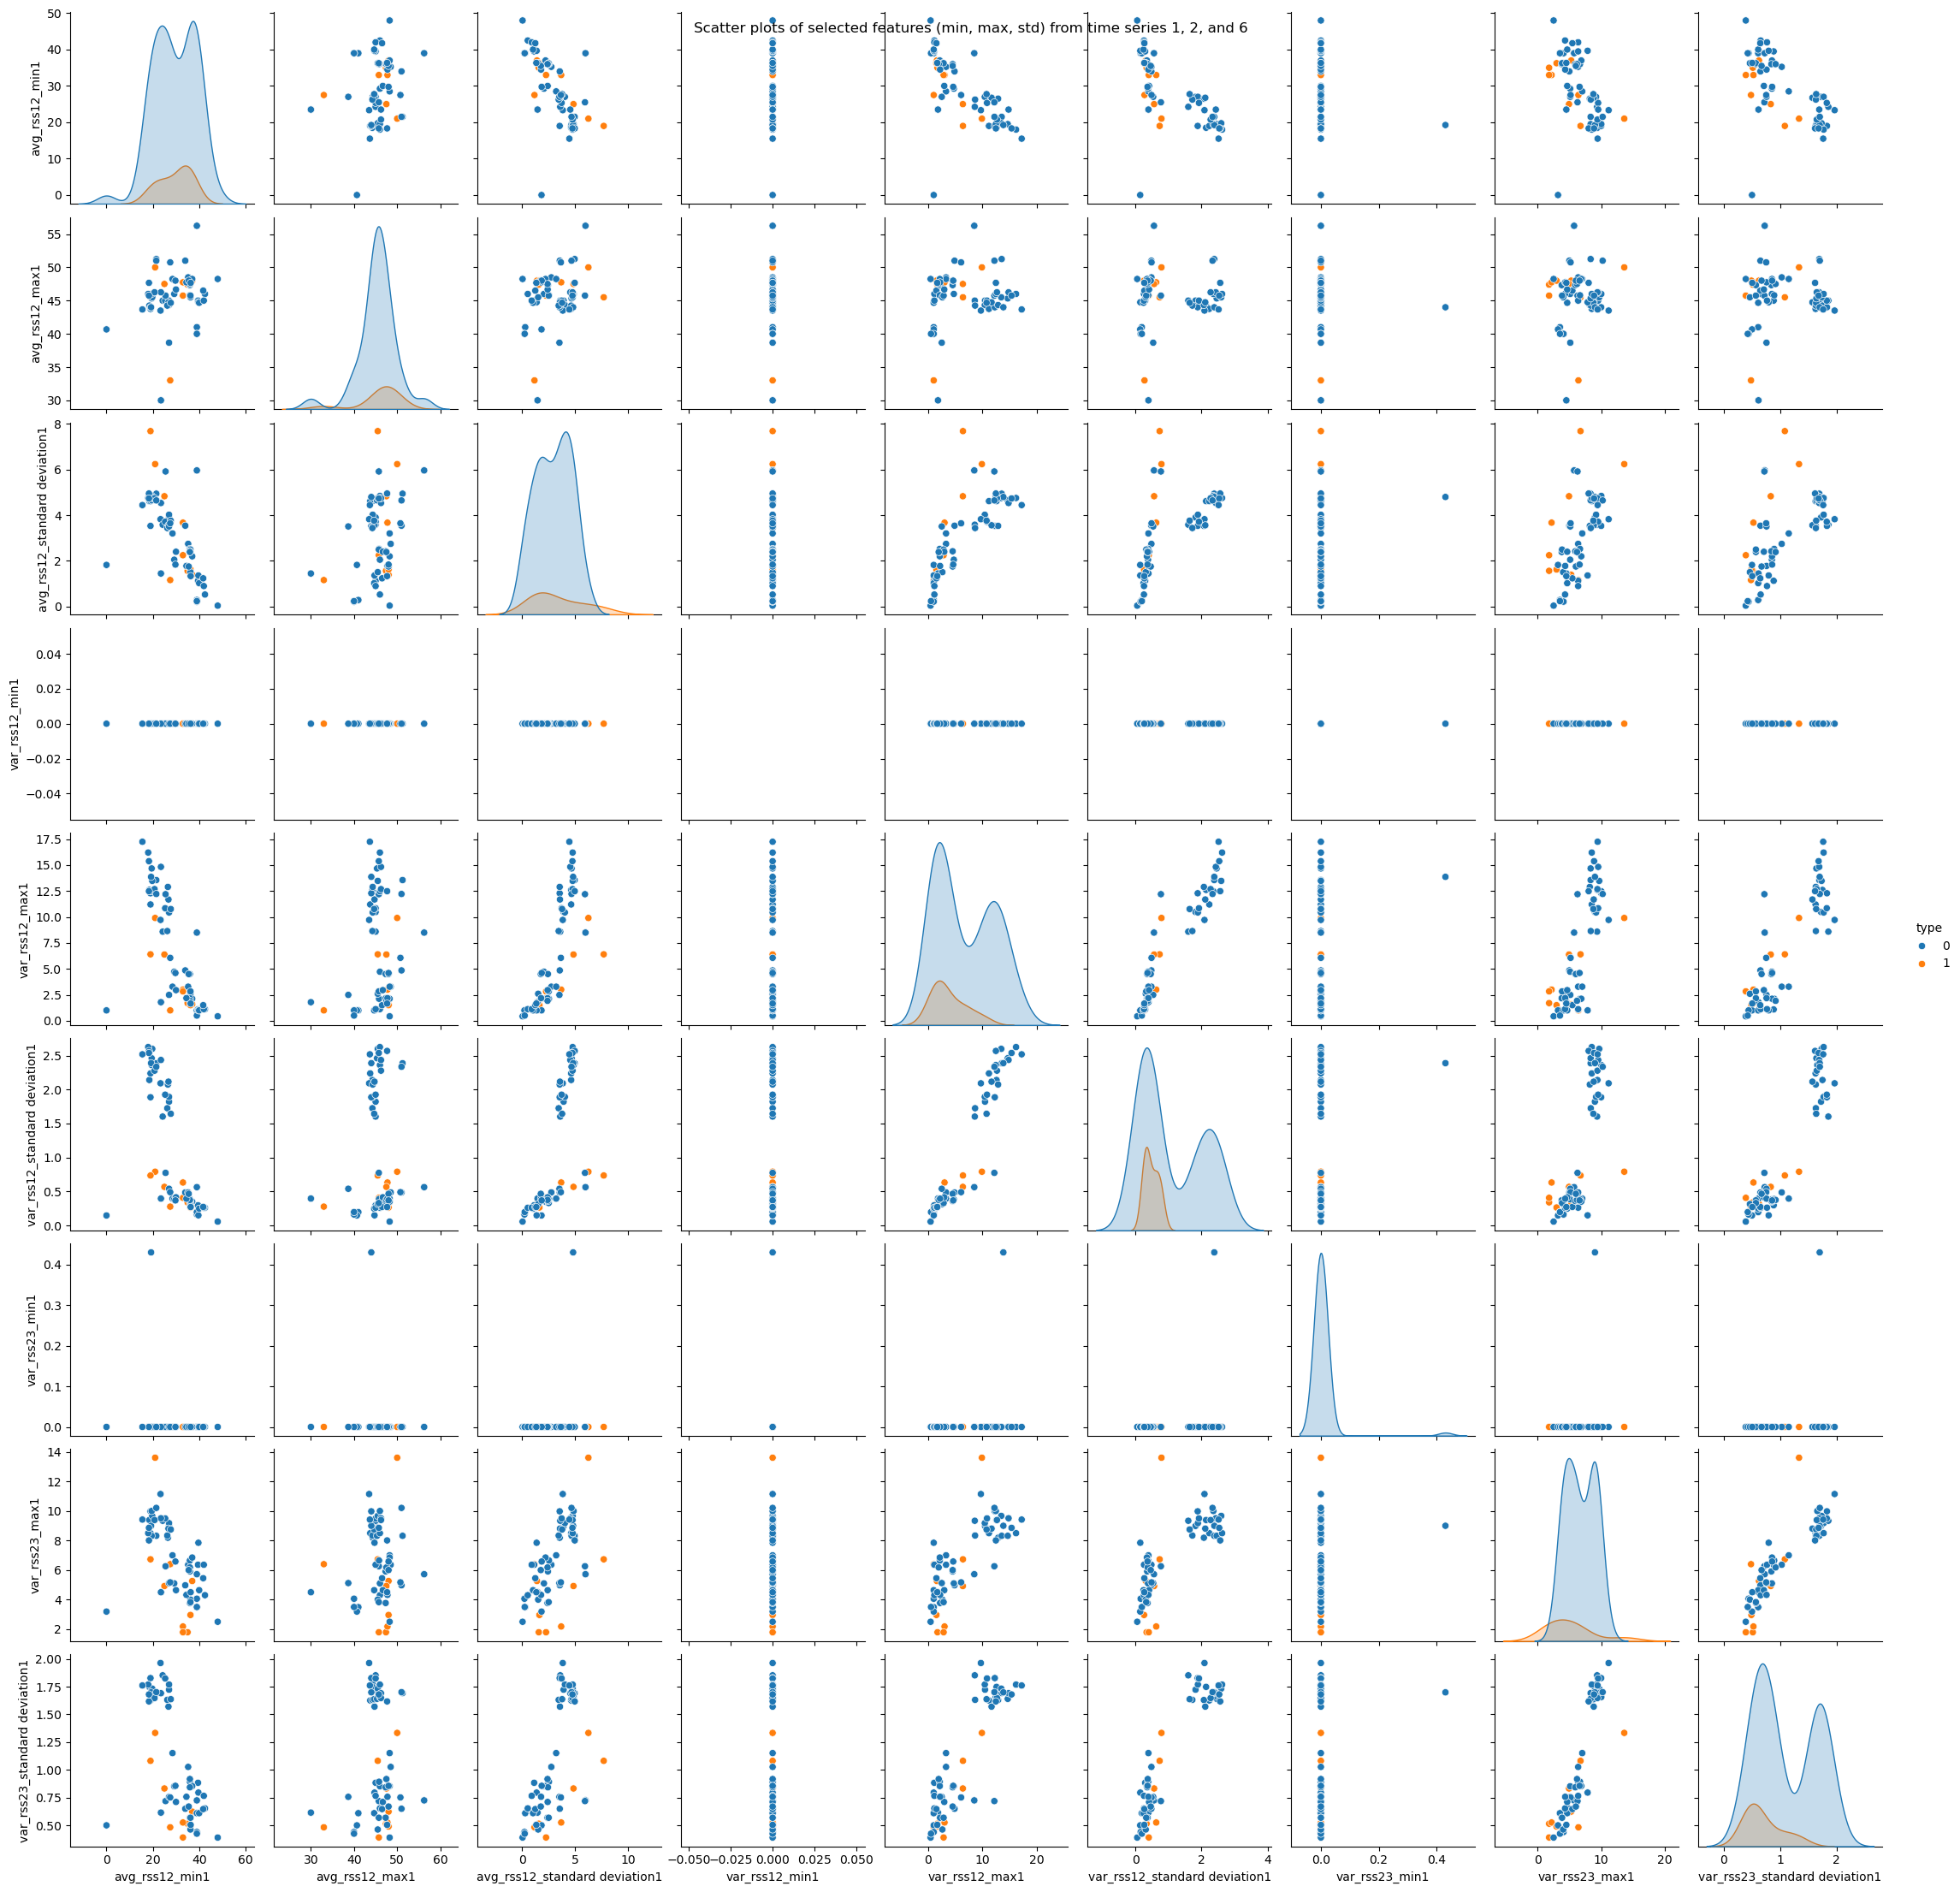

In [35]:
selected_time_series = ['avg_rss12', 'var_rss12', 'var_rss23']
selected_features = ['min', 'max', 'std']
headers = get_features(selected_time_series, selected_features, 1)
train_data_df = get_data_modified(train_data_map, 1, headers, selected_time_series, selected_features)    
sns.pairplot(data = train_data_df, hue = 'type')
plt.suptitle('Scatter plots of selected features (min, max, std) from time series 1, 2, and 6')
plt.show()

### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e. depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

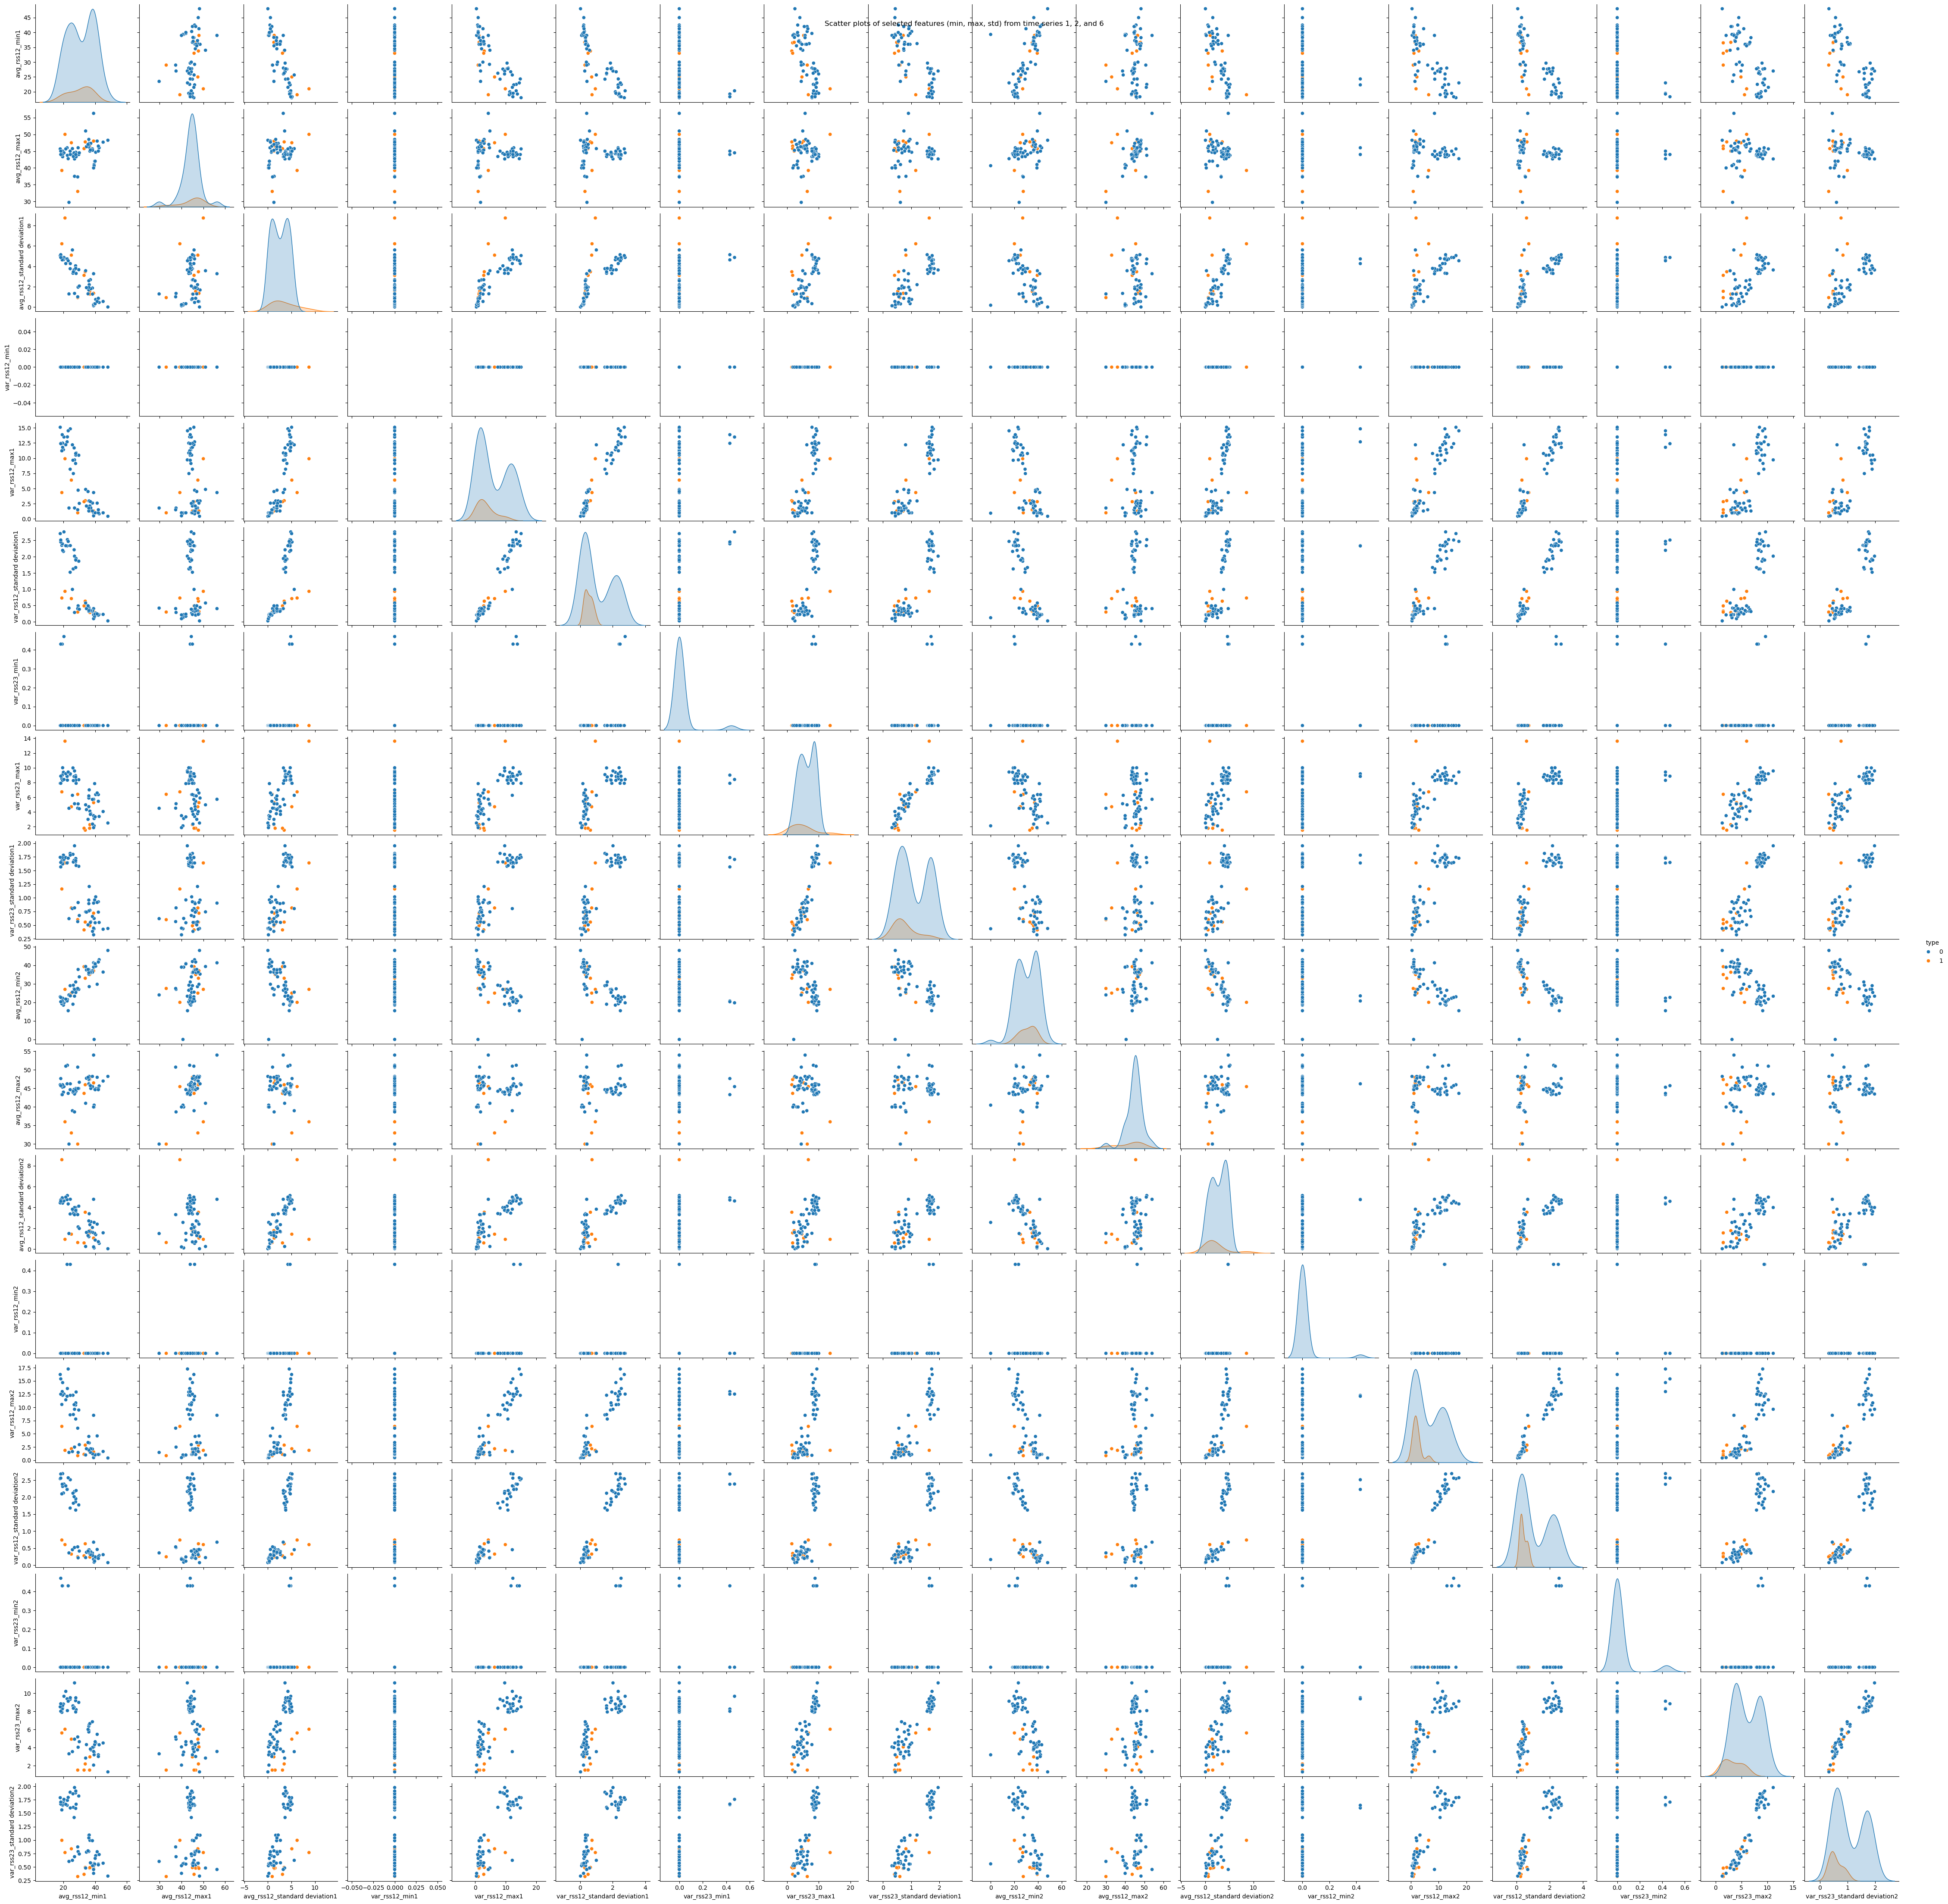

In [37]:
headers = get_features(selected_time_series, selected_features, 2) # split twice
train_data_df = get_data_modified(train_data_map, 2, headers, selected_time_series, selected_features)    
sns.pairplot(data = train_data_df, hue = 'type')
plt.suptitle('Scatter plots of selected features (min, max, std) from time series 1, 2, and 6')
plt.show()

There is no significant difference in the results with those of 2(a)i.

### iii. Break each time series in your training set into l ∈ {1,2,...,20}. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Explain what the right way and the wrong way are to perform cross-validation in this problem. 

In [40]:
def oversample_imbalance_class(train_df):
    total_bending = train_df.loc[train_df['type'] == 0].shape[0]
    total_other = train_df.loc[train_df['type'] == 1].shape[0]
    minor_label, major_label = (1, 0) if total_bending > total_other else (0, 1)
    minor_df = train_df[train_df['type'] == minor_label]
    major_df = train_df[train_df['type'] == major_label]
    minor_df = resample(minor_df, replace = True, random_state = 60, n_samples = max(total_bending, total_other))
    train_df = pd.concat([major_df, minor_df])
    return train_df

In [41]:
all_time_series = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
all_features = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
selected_features = ['min', 'max', 'std']
# Source: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.RFE.html
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html
# Source: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.RFECV.html
def logistic_regression(train_data_map, test_data_map, split, time_series=all_time_series, features=all_features, oversampling=False):
    headers = get_features(time_series, features, split)
    train_df = get_data_modified(train_data_map, split, headers, time_series, features)    
    
    if oversampling: 
        train_df = oversample_imbalance_class(train_df)
    
    trainX = train_df.iloc[:, :-1]
    trainY = train_df.iloc[:, -1]

    validator = StratifiedKFold(n_splits=5, shuffle = True, random_state = 69)
    model = LogisticRegression(solver='liblinear')
    rfecv = RFECV(estimator = model, cv = validator, scoring = 'accuracy')
    rfecv.fit(trainX, trainY)
    
    test_accuracy = rfecv.cv_results_['mean_test_score'].max()
    
    return model, rfecv, test_accuracy

In [42]:
# Source: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.RFECV.html
from sklearn.feature_selection import RFECV

LR_result = {'l': [], 'n_features_': [], 'score': []}
for l in range(1, 21):
    model, rfecv, score = logistic_regression(train_data_map, test_data_map, l, features=selected_features, oversampling=False)
    LR_result['l'].append(l)
    LR_result['n_features_'].append(rfecv.n_features_)
    LR_result['score'].append(score)

LR_result = pd.DataFrame(LR_result)

In [43]:
LR_result

l  n_features_     score
0    1            4  0.971429
1    2            8  0.971429
2    3            4  0.957143
3    4            4  0.957143
4    5            2  0.928571
5    6           10  0.957143
6    7            5  0.957143
7    8            7  0.971429
8    9            5  0.985714
9   10            9  0.957143
10  11            9  0.957143
11  12            9  0.971429
12  13            6  0.971429
13  14           11  0.985714
14  15            9  0.957143
15  16            5  0.971429
16  17           18  0.985714
17  18            5  0.985714
18  19           11  1.000000
19  20           15  0.971429

In [44]:
print(f'best (l,p): ({LR_result['l'][LR_result['score'].argmax()]}, {LR_result['n_features_'][LR_result['score'].argmax()]}) and the score is {LR_result['score'][LR_result['score'].argmax()]}')

best (l,p): (19, 11) and the score is 1.0


As professor mentioned in a class before, the common k value for K-Fold Cross-Validation is 5 or 10.  
The wrong way to perform cross-validation is performing cross-validation before RFE. This is because that would ignore the fact that in RFE. Therefore, the right way should perform RFE along with corss-validation. This is because cross-validation might cause the class imbalance, and that is why we used stratified cross-validation.

In sum:
 - Right way: Do RFE along with cross validation.
 - Wrong way: Do RFE before cross validation.

### iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [47]:
def selected_features_from_regression(features, rfecv):
    selected_features = []
    for i, feature in enumerate(features):
        if rfecv.support_[i]:
            selected_features.append(feature)
    return selected_features

In [48]:
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
from sklearn.metrics import roc_curve, auc

def ROC_curve(true_y, pred_y_prob, model):
    for i, class_label in enumerate(model.classes_):
        y_pred_prob = pred_y_prob[:, i] 
        fpr, tpr, thresholds = roc_curve(true_y, y_pred_prob, pos_label=class_label)
        roc_auc = auc(fpr, tpr)

        if len(model.classes_) == 2:
            label = f"Class: {binary_class_dict[class_label]}; AUC: {roc_auc:.4f}"
        else:
            label = f"Class: {rev_classes_dict[class_label]}; AUC: {roc_auc:.4f}"
        
        plt.plot(fpr, tpr, label=label)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
    plt.xlabel("FPR")  
    plt.ylabel("TPR")
    plt.title("ROC Curve") 
    plt.legend(loc="lower right") 
    plt.grid(True)
    plt.show()

In [49]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(model, X, y, selected_features, test_data = False):
    if not test_data:
        model.fit(X.loc[:, selected_features], y.to_numpy(dtype = "int"))
    pred_y = model.predict(X.loc[:, selected_features])
    pred_y_prob = model.predict_proba(X.loc[:, selected_features])
    pred_y = pred_y.round()
    true_y = y.to_numpy(dtype = float)
    score = model.score(X.loc[:, selected_features], y.to_numpy(dtype = "int"))
    print(f"Accuracy: {score}")
    print(confusion_matrix(true_y, pred_y))
    return (score, true_y, pred_y_prob, model)

In [50]:
best_index = LR_result['score'].argmax()
headers = get_features(all_time_series, selected_features, best_index+1)
model_lr, rfecv, score = logistic_regression(train_data_map, test_data_map, split=best_index+1, features=selected_features, oversampling=False)

RFE_selected_features = selected_features_from_regression(headers[:-1], rfecv)
print(f"For (l,p): ({LR_result['l'][LR_result['score'].argmax()]}, {LR_result['n_features_'][LR_result['score'].argmax()]}), RFE Selected Features: {RFE_selected_features}")

For (l,p): (19, 11), RFE Selected Features: ['avg_rss23_min2', 'avg_rss23_min3', 'avg_rss23_max3', 'avg_rss23_max4', 'avg_rss23_min6', 'avg_rss12_max10', 'avg_rss12_max11', 'avg_rss12_max12', 'avg_rss12_max13', 'avg_rss23_min16', 'avg_rss23_min18']


In [51]:
new_train_df = get_data_modified(train_data_map, best_index+1, headers, all_time_series, selected_features)
new_train_x = new_train_df.iloc[:, :-1]
new_train_y = new_train_df.iloc[:,-1]
score, true_y, pred_y_prob, new_model = get_confusion_matrix(model_lr, new_train_x, new_train_y, RFE_selected_features)

Accuracy: 1.0
[[60  0]
 [ 0  9]]


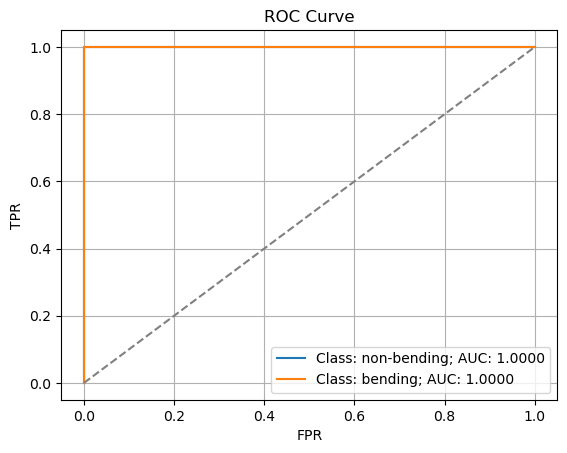

In [52]:
ROC_curve(true_y, pred_y_prob, new_model)

In [53]:
df_tmp = new_train_x.loc[:, RFE_selected_features]
new_model = sm.Logit(new_train_y.to_numpy(dtype = float), sm.add_constant(df_tmp.to_numpy(dtype = float)))
print(new_model.fit(method = 'bfgs').summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                           11
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        01:07:51   Log-Likelihood:            -1.3713e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.496e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0114   2.05e+04  -5.5

### v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [55]:
new_test_df = get_data_modified(test_data_map, best_index+1, headers,all_time_series, selected_features)
new_test_x = new_test_df.iloc[:, :-1]
new_test_y = new_test_df.iloc[:, -1]
test_score, true_test_y, pred_test_y_prob, new_test_model = get_confusion_matrix(model_lr, new_train_x, new_train_y, RFE_selected_features)

Accuracy: 1.0
[[60  0]
 [ 0  9]]


In [56]:
test_df_tmp = new_test_x.loc[:, RFE_selected_features]
new_test_model = sm.Logit(new_test_y.to_numpy(dtype = float), sm.add_constant(test_df_tmp.to_numpy(dtype = float)))
print(new_test_model.fit(method = 'bfgs').summary())

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   19
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                           11
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        01:07:54   Log-Likelihood:            -2.9134e-05
converged:                       True   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                   0.05180
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0745   8.65e+04  -8.6

The accuracy on the test set with the cross-validation accuracy is same as the train set.

### vi. Do your classes seem to be well-seperated to cause instability in calculating logistic regression parameters?

Yes, the classes seem to be completed separation. The results in v. show that there is complete seperation to cause instability in calculating logistic regression params.

### vii. From the confusion metrices you obtained, do you see imbalance classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes, the confusion metrices show that there is imbalance classes since the difference between true positive and true negative, which is 60 and 9 respectively, is quite large when the total instances are 69.

In [62]:
# Source: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.RFECV.html
LR_oversampling_result = {'l': [], 'n_features_': [], 'score': []}
for l in range(1, 21):
    model, rfecv, score = logistic_regression(train_data_map, test_data_map, l, features=selected_features, oversampling=True)
    LR_oversampling_result['l'].append(l)
    LR_oversampling_result['n_features_'].append(rfecv.n_features_)
    LR_oversampling_result['score'].append(score)

LR_oversampling_result = pd.DataFrame(LR_oversampling_result)

In [63]:
LR_oversampling_result

l  n_features_     score
0    1            6  0.991667
1    2            6  1.000000
2    3            8  1.000000
3    4           12  0.983333
4    5            9  0.983333
5    6            4  0.983333
6    7            3  0.991667
7    8            3  0.983333
8    9            5  1.000000
9   10            7  0.991667
10  11            9  0.991667
11  12            5  1.000000
12  13            3  1.000000
13  14           15  1.000000
14  15            5  0.983333
15  16            2  0.991667
16  17            5  1.000000
17  18            4  1.000000
18  19            4  1.000000
19  20            7  0.991667

In [64]:
sampling_best_index = LR_oversampling_result['score'].argmax()
sampling_headers = get_features(all_time_series, selected_features, sampling_best_index+1)
sampling_model_lr, sampling_rfecv, sampling_score = logistic_regression(train_data_map, test_data_map, split=sampling_best_index+1, features=selected_features, oversampling=True)

sampling_RFE_selected_features = selected_features_from_regression(sampling_headers[:-1], sampling_rfecv)
print(f"For (l,p): ({LR_oversampling_result['l'][LR_oversampling_result['score'].argmax()]}, {LR_oversampling_result['n_features_'][LR_oversampling_result['score'].argmax()]}), RFE with sampling Selected Features: {sampling_RFE_selected_features}")

For (l,p): (2, 6), RFE with sampling Selected Features: ['avg_rss12_min1', 'var_rss12_max1', 'avg_rss23_min1', 'avg_rss23_max1', 'avg_rss12_max2', 'var_rss23_max2']


In [65]:
sampling_train_df = get_data_modified(train_data_map, sampling_best_index+1, sampling_headers, all_time_series, selected_features)
sampling_train_df = oversample_imbalance_class(sampling_train_df)
sampling_train_x = sampling_train_df.iloc[:, :-1]
sampling_train_y = sampling_train_df.iloc[:,-1]
score, true_y, pred_y_prob, new_model = get_confusion_matrix(sampling_model_lr, sampling_train_x, sampling_train_y, sampling_RFE_selected_features)

Accuracy: 1.0
[[60  0]
 [ 0 60]]


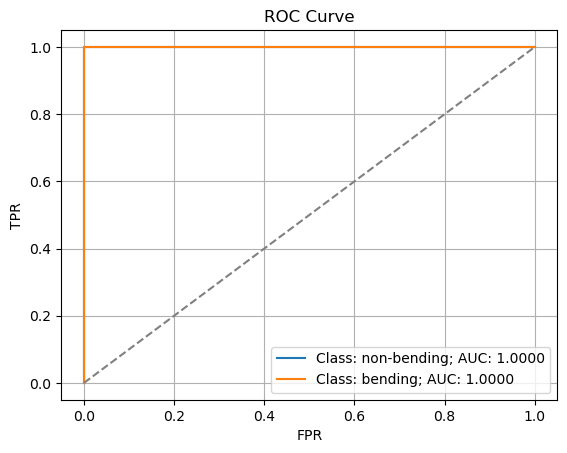

In [66]:
ROC_curve(true_y, pred_y_prob, new_model)

In [67]:
sampling_train_df_tmp = sampling_train_x.loc[:, sampling_RFE_selected_features]
sampling_train_model = sm.Logit(sampling_train_y.to_numpy(dtype = float), sm.add_constant(sampling_train_df_tmp.to_numpy(dtype = float)))
print(sampling_train_model.fit(method = 'bfgs').summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        01:10:31   Log-Likelihood:            -1.8412e-05
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 2.666e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4835   8.14e+05  -5.9

In [68]:
sampling_test_df = get_data_modified(test_data_map, sampling_best_index+1, sampling_headers, all_time_series, selected_features)
sampling_test_df = oversample_imbalance_class(sampling_test_df)
sampling_test_x = sampling_test_df.iloc[:, :-1]
sampling_test_y = sampling_test_df.iloc[:,-1]
score, true_y, pred_y_prob, new_model = get_confusion_matrix(sampling_model_lr, sampling_test_x, sampling_test_y, sampling_RFE_selected_features)

Accuracy: 1.0
[[15  0]
 [ 0 15]]


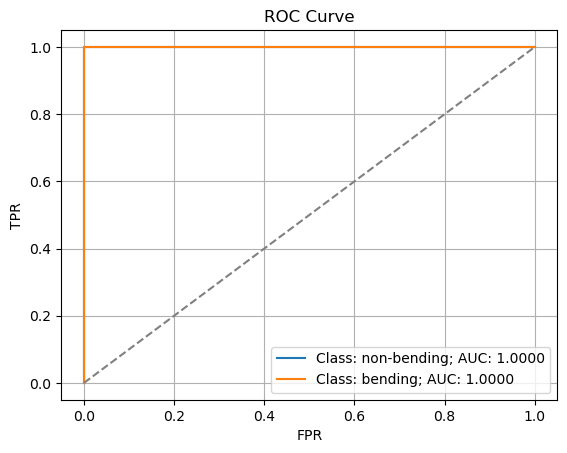

In [69]:
ROC_curve(true_y, pred_y_prob, new_model)

In [70]:
sampling_test_df_tmp = sampling_test_x.loc[:, sampling_RFE_selected_features]
sampling_test_model = sm.Logit(sampling_test_y.to_numpy(dtype = float), sm.add_constant(sampling_test_df_tmp.to_numpy(dtype = float)))
print(sampling_test_model.fit(method = 'bfgs').summary())

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        01:10:32   Log-Likelihood:            -1.9108e-05
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 2.217e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0999   9.83e+04   1.0

## (b) Binary Classification Using L1-penalized logistic regression

### i. Repeat 2(a)iii using L1-penalized logistic regressin, i.e. instead of using p-values for variable selection, use L1 regularization.

In [73]:
# Source: https://scikit-learn.org/dev/auto_examples/linear_model/plot_logistic_path.html
# Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html
# Source: https://stackoverflow.com/questions/65241473/is-there-a-parameter-to-set-a-penalty-threshold-in-sklearn
from sklearn.linear_model import LogisticRegressionCV

In [74]:
def binary_classification_using_l1_penalized_logistic_regression(l, features):
    headers = get_features(all_time_series, features, l)
    train_df = get_data_modified(train_data_map, l, headers, all_time_series, features, binary=True)
    test_df = get_data_modified(test_data_map, l, headers, all_time_series, features, binary=True)
    
    train_x = train_df.iloc[:, :-1]
    train_y = train_df.iloc[:, -1]
    test_x = test_df.iloc[:, :-1]
    test_y = test_df.iloc[:, -1]

    # Source: https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
    model = LogisticRegressionCV(penalty='l1', scoring='accuracy', solver='liblinear', random_state=42) # default C value is 10
    model.fit(train_x, train_y)
    for i, c in enumerate(model.Cs_):
        if (c == model.C_[0]): 
            idx = i
    score = np.mean(model.scores_[1][:idx])
    p = (model.coef_ > 0.000000001).sum()
    return model, score, p

In [75]:
l1_LR_result = {'l': [], 'p': [], 'score': []}
for l in range(1, 21):
    model, score,p = binary_classification_using_l1_penalized_logistic_regression(l, selected_features)
    l1_LR_result['l'].append(l)
    l1_LR_result['p'].append(p)
    l1_LR_result['score'].append(score)

l1_LR_result = pd.DataFrame(l1_LR_result)

In [76]:
l1_LR_result

l   p     score
0    1   2  0.907143
1    2   3  0.932198
2    3   4  0.932198
3    4   5  0.914286
4    5   4  0.891071
5    6   6  0.911868
6    7  10  0.909231
7    8   4  0.901786
8    9   5  0.903571
9   10   7  0.892857
10  11   5  0.907143
11  12  13  0.910659
12  13   6  0.903571
13  14   6  0.908929
14  15   9  0.901758
15  16  13  0.908901
16  17  14  0.910330
17  18   7  0.912088
18  19   8  0.917802
19  20   9  0.911868

In [77]:
print(f"Best accuracy is {l1_LR_result['score'][l1_LR_result['score'].argmax()]} when l is {l1_LR_result['l'][l1_LR_result['score'].argmax()]}.")

Best accuracy is 0.932197802197802 when l is 2.


### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [79]:
comparison_df = pd.DataFrame({
    'l': LR_result['l'],
    'LR_score': LR_result['score'],
    'LR_oversampling_score': LR_oversampling_result['score'],
    'l1_LR_score': l1_LR_result['score']
})
comparison_df

l  LR_score  LR_oversampling_score  l1_LR_score
0    1  0.971429               0.991667     0.907143
1    2  0.971429               1.000000     0.932198
2    3  0.957143               1.000000     0.932198
3    4  0.957143               0.983333     0.914286
4    5  0.928571               0.983333     0.891071
5    6  0.957143               0.983333     0.911868
6    7  0.957143               0.991667     0.909231
7    8  0.971429               0.983333     0.901786
8    9  0.985714               1.000000     0.903571
9   10  0.957143               0.991667     0.892857
10  11  0.957143               0.991667     0.907143
11  12  0.971429               1.000000     0.910659
12  13  0.971429               1.000000     0.903571
13  14  0.985714               1.000000     0.908929
14  15  0.957143               0.983333     0.901758
15  16  0.971429               0.991667     0.908901
16  17  0.985714               1.000000     0.910330
17  18  0.985714               1.000000     0.912088
18  19  1.000000               1.000000     0.917802
19  20  0.971429               0.991667     0.911868

- The results show that the logistic regression with p-values(2(a)iii) performs better than the L1-penalized logistic regression model, especially when using oversamping.
- It seems L1 regularization logistic regression model is more easier to implement because while logistic regression model with p-values has to find the optimal (l,p) pair, however, scikit-learn provides built-in support for the L1 regularization model. Since L1-penalized logistic regression model only requires a small parameter change, it seems more easier to implement than using p-values.

## (c) Multi-class Classification (The Realistic Case)

### i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [83]:
def l1_penalized_multinomial_logistic_regression(l, features):
    headers = get_features(all_time_series, features, l)
    train_df = get_data_modified(train_data_map, l, headers, all_time_series, features, binary=False)
    test_df = get_data_modified(test_data_map, l, headers, all_time_series, features, binary=False)
    
    train_x = train_df.iloc[:, :-1]
    train_y = train_df.iloc[:, -1]
    test_x = test_df.iloc[:, :-1]
    test_x = test_x[train_x.columns]  # Align columns in test_x with train_x
    test_y = test_df.iloc[:, -1]

    model = LogisticRegressionCV(penalty='l1', multi_class='multinomial', solver='saga', max_iter=100)
    model.fit(train_x, train_y)
    
    for i, c in enumerate(model.Cs_):
        if (c == model.C_[0]): 
            idx = i
            
    score = np.mean([np.mean(model.scores_[class_][:, idx]) for class_ in model.scores_.keys()])
    error = 1 - score
    p = (model.coef_ > 0.000000001).sum()
    
    return model, score, error, test_x, test_y

In [84]:
l1_multi_result = {'l': [], 'p':[], 'score': [], 'error': []}
multi_model = []
for l in range(1, 21):
    model, score, error, test_x, test_y = l1_penalized_multinomial_logistic_regression(l, selected_features)
    l1_multi_result['l'].append(l)
    l1_multi_result['p'].append(p)
    l1_multi_result['score'].append(score)
    l1_multi_result['error'].append(error)
    multi_model.append(model)
l1_multi_result = pd.DataFrame(l1_multi_result)

C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarnin

In [85]:
l1_multi_result

l  p     score     error
0    1  9  0.882418  0.117582
1    2  9  0.854945  0.145055
2    3  9  0.783516  0.216484
3    4  9  0.813187  0.186813
4    5  9  0.826374  0.173626
5    6  9  0.856044  0.143956
6    7  9  0.783516  0.216484
7    8  9  0.768132  0.231868
8    9  9  0.769231  0.230769
9   10  9  0.797802  0.202198
10  11  9  0.739560  0.260440
11  12  9  0.784615  0.215385
12  13  9  0.798901  0.201099
13  14  9  0.798901  0.201099
14  15  9  0.783516  0.216484
15  16  9  0.754945  0.245055
16  17  9  0.756044  0.243956
17  18  9  0.769231  0.230769
18  19  9  0.739560  0.260440
19  20  9  0.725275  0.274725

In [86]:
best_l = l1_multi_result['l'][l1_multi_result['score'].argmax()]
best_multi_model = multi_model[l1_multi_result['score'].argmax()]
print(f'best l: {best_l}, best_score: {l1_multi_result['score'][l1_multi_result['score'].argmax()]}')

best l: 1, best_score: 0.8824175824175826


In [87]:
multi_headers = get_features(all_time_series, selected_features, best_l)
multi_train_df = get_data_modified(train_data_map, best_l, multi_headers, all_time_series, selected_features, binary=False)
multi_test_df = get_data_modified(test_data_map, best_l, multi_headers, all_time_series, selected_features, binary=False)
multi_train_x, multi_train_y = multi_train_df.iloc[:, :-1], multi_train_df.iloc[:, -1]
multi_test_x, multi_test_y = multi_test_df.iloc[:, :-1], multi_test_df.iloc[:, -1]

multi_pred_y = best_multi_model.predict(multi_test_x)
multi_confusion_matrix = confusion_matrix(multi_test_y, multi_pred_y)

Confusion matrix

In [89]:
print(multi_confusion_matrix)

[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 2 0 0 0 1]
 [0 0 0 2 0 1 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


In [90]:
multi_train_predict = best_multi_model.predict_proba(multi_train_x)
multi_test_predict = best_multi_model.predict_proba(multi_test_x)

ROC Curve for the train set

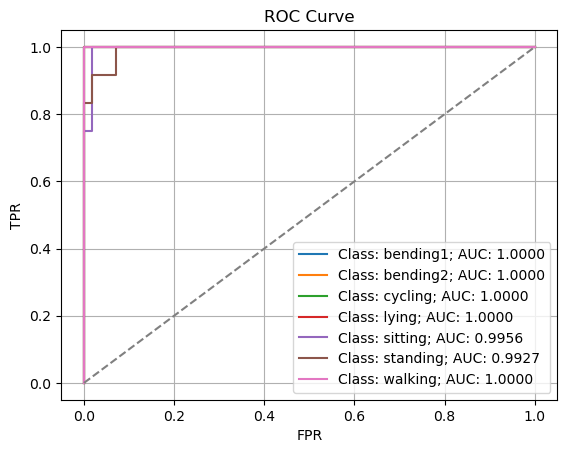

In [92]:
ROC_curve(multi_train_y, multi_train_predict, best_multi_model)

ROC curve for the test set

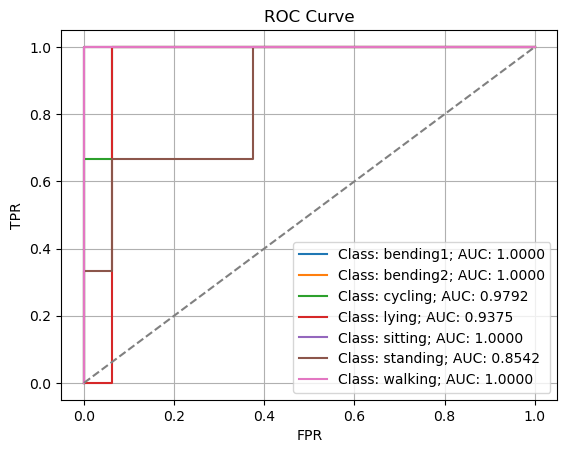

In [94]:
ROC_curve(multi_test_y, multi_test_predict, best_multi_model)

### ii. Repeat 2(c)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

In [96]:
# Source: https://scikit-learn.org/0.15/modules/generated/sklearn.naive_bayes.GaussianNB.html
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html
# Source: https://www.geeksforgeeks.org/gaussian-naive-bayes-using-sklearn/
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Source: https://stackoverflow.com/questions/52611498/need-help-understanding-cross-val-score-in-sklearn-python

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

def naive_bayes_gaussian(l, features):
    headers = get_features(all_time_series, features, l)
    train_df = get_data_modified(train_data_map, l, headers, all_time_series, features, binary=False)
    test_df = get_data_modified(test_data_map, l, headers, all_time_series, features, binary=False)
    
    train_x = train_df.iloc[:, :-1]
    train_y = train_df.iloc[:, -1]
    test_x = test_df.iloc[:, :-1]
    test_x = test_x[train_x.columns] 
    test_y = test_df.iloc[:, -1]

    model = GaussianNB()
    score = cross_val_score(estimator=model, X=train_x, y=train_y, scoring="accuracy")
    score = np.mean(score)    
    error = 1 - score
    
    return model, score, error

In [97]:
l1_naive_bayes_gaussian_result = {'l': [], 'score': [], 'error': []}
naive_bayes_gaussian_model = []
for l in range(1, 21):
    model, score, error = naive_bayes_gaussian(l, selected_features)
    l1_naive_bayes_gaussian_result['l'].append(l)
    l1_naive_bayes_gaussian_result['score'].append(score)
    l1_naive_bayes_gaussian_result['error'].append(error)
    naive_bayes_gaussian_model.append(model)
l1_naive_bayes_result = pd.DataFrame(l1_naive_bayes_gaussian_result)

C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\s

In [98]:
l1_naive_bayes_result

l     score     error
0    1  0.870330  0.129670
1    2  0.884615  0.115385
2    3  0.783516  0.216484
3    4  0.783516  0.216484
4    5  0.724176  0.275824
5    6  0.696703  0.303297
6    7  0.694505  0.305495
7    8  0.726374  0.273626
8    9  0.593407  0.406593
9   10  0.652747  0.347253
10  11  0.651648  0.348352
11  12  0.596703  0.403297
12  13  0.654945  0.345055
13  14  0.624176  0.375824
14  15  0.581319  0.418681
15  16  0.565934  0.434066
16  17  0.523077  0.476923
17  18  0.551648  0.448352
18  19  0.536264  0.463736
19  20  0.564835  0.435165

In [99]:
best_l = l1_naive_bayes_result['l'][l1_naive_bayes_result['score'].argmax()]
best_nb_gaussian_model = naive_bayes_gaussian_model[l1_naive_bayes_result['score'].argmax()]
print(f'best l: {best_l}, best_score: {l1_naive_bayes_result['score'][l1_naive_bayes_result['score'].argmax()]}')

best l: 2, best_score: 0.8846153846153847


In [100]:
nb_gaussian_headers = get_features(all_time_series, selected_features, best_l)
nb_gaussian_train_df = get_data_modified(train_data_map, best_l, nb_gaussian_headers, all_time_series, selected_features, binary=False)
nb_gaussian_test_df = get_data_modified(test_data_map, best_l, nb_gaussian_headers, all_time_series, selected_features, binary=False)
nb_gaussian_train_x, nb_gaussian_train_y = nb_gaussian_train_df.iloc[:, :-1], nb_gaussian_train_df.iloc[:, -1]
nb_gaussian_test_x, nb_gaussian_test_y = nb_gaussian_test_df.iloc[:, :-1], nb_gaussian_test_df.iloc[:, -1]

best_nb_gaussian_model = best_nb_gaussian_model.fit(nb_gaussian_train_x, nb_gaussian_train_y)
nb_gaussian_pred_y = best_nb_gaussian_model.predict(nb_gaussian_test_x)
nb_gaussian_confusion_matrix = confusion_matrix(nb_gaussian_test_y, nb_gaussian_pred_y)

Confusion matrix for Naive Bayes Gaussian

In [102]:
print(nb_gaussian_confusion_matrix)

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 2 0 0 0 1]]


ROC curve for the train set

In [104]:
nb_gaussian_train_predict = best_nb_gaussian_model.predict_proba(nb_gaussian_train_x)
nb_gaussian_test_predict = best_nb_gaussian_model.predict_proba(nb_gaussian_test_x)

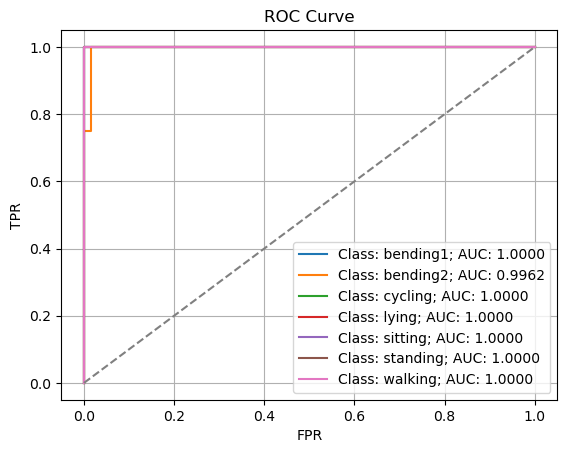

In [105]:
ROC_curve(nb_gaussian_train_y, nb_gaussian_train_predict, best_nb_gaussian_model)

ROC curve for the test set

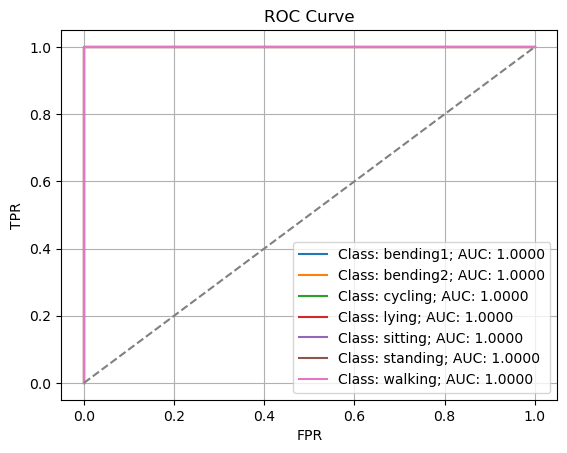

In [107]:
ROC_curve(nb_gaussian_test_y, nb_gaussian_test_predict, best_nb_gaussian_model)

In [108]:
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# Source: https://scikit-learn.org/0.24/modules/generated/sklearn.naive_bayes.MultinomialNB.html

from sklearn.naive_bayes import MultinomialNB

In [109]:
def naive_bayes_multinomial(l, features):
    headers = get_features(all_time_series, features, l)
    train_df = get_data_modified(train_data_map, l, headers, all_time_series, features, binary=False)
    test_df = get_data_modified(test_data_map, l, headers, all_time_series, features, binary=False)
    
    train_x = train_df.iloc[:, :-1]
    train_y = train_df.iloc[:, -1]
    test_x = test_df.iloc[:, :-1]
    test_x = test_x[train_x.columns] 
    test_y = test_df.iloc[:, -1]

    model = MultinomialNB()
    score = cross_val_score(estimator=model, X=train_x, y=train_y, scoring="accuracy")
    score = np.mean(score)    
    error = 1 - score
    
    return model, score, error

In [110]:
l1_naive_bayes_multinomial_result = {'l': [], 'score': [], 'error': []}
naive_bayes_multinomial_model = []
for l in range(1, 21):
    model, score, error = naive_bayes_multinomial(l, selected_features)
    l1_naive_bayes_multinomial_result['l'].append(l)
    l1_naive_bayes_multinomial_result['score'].append(score)
    l1_naive_bayes_multinomial_result['error'].append(error)
    naive_bayes_multinomial_model.append(model)
l1_naive_bayes_multinomial_result = pd.DataFrame(l1_naive_bayes_multinomial_result)

C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gunho\anaconda3\Lib\s

In [111]:
l1_naive_bayes_multinomial_result

l     score     error
0    1  0.740659  0.259341
1    2  0.712088  0.287912
2    3  0.652747  0.347253
3    4  0.770330  0.229670
4    5  0.797802  0.202198
5    6  0.813187  0.186813
6    7  0.826374  0.173626
7    8  0.813187  0.186813
8    9  0.797802  0.202198
9   10  0.826374  0.173626
10  11  0.813187  0.186813
11  12  0.797802  0.202198
12  13  0.827473  0.172527
13  14  0.797802  0.202198
14  15  0.754945  0.245055
15  16  0.783516  0.216484
16  17  0.756044  0.243956
17  18  0.784615  0.215385
18  19  0.769231  0.230769
19  20  0.769231  0.230769

In [112]:
best_l = l1_naive_bayes_multinomial_result['l'][l1_naive_bayes_multinomial_result['score'].argmax()]
best_nb_multinomial_model = naive_bayes_multinomial_model[l1_naive_bayes_multinomial_result['score'].argmax()]
print(f'best l: {best_l}, best_score: {l1_naive_bayes_multinomial_result['score'][l1_naive_bayes_multinomial_result['score'].argmax()]}')

best l: 13, best_score: 0.8274725274725275


In [113]:
nb_multinomial_headers = get_features(all_time_series, selected_features, best_l)
nb_multinomial_train_df = get_data_modified(train_data_map, best_l, nb_multinomial_headers, all_time_series, selected_features, binary=False)
nb_multinomial_test_df = get_data_modified(test_data_map, best_l, nb_multinomial_headers, all_time_series, selected_features, binary=False)
nb_multinomial_train_x, nb_multinomial_train_y = nb_multinomial_train_df.iloc[:, :-1], nb_multinomial_train_df.iloc[:, -1]
nb_multinomial_test_x, nb_multinomial_test_y = nb_multinomial_test_df.iloc[:, :-1], nb_multinomial_test_df.iloc[:, -1]

best_nb_multinomial_model = best_nb_multinomial_model.fit(nb_multinomial_train_x, nb_multinomial_train_y)
nb_multinomial_pred_y = best_nb_multinomial_model.predict(nb_multinomial_test_x)
nb_multinomial_confusion_matrix = confusion_matrix(nb_multinomial_test_y, nb_multinomial_pred_y)

In [114]:
print(nb_multinomial_confusion_matrix)

[[2 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 0 3]]


In [115]:
nb_multinomial_train_predict = best_nb_multinomial_model.predict_proba(nb_multinomial_train_x)
nb_multinomial_test_predict = best_nb_multinomial_model.predict_proba(nb_multinomial_test_x)

Naive Bayes Multinomial ROC curve for the train set

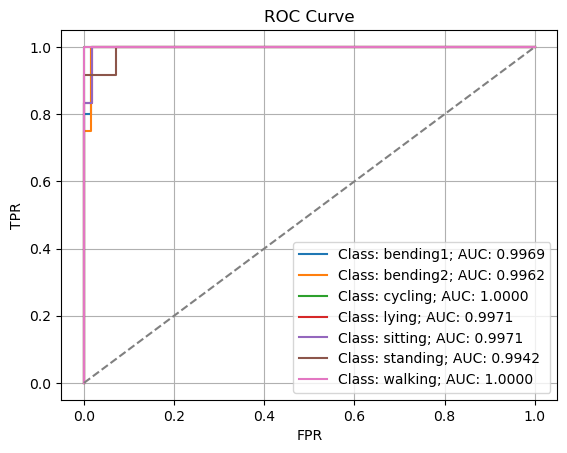

In [117]:
ROC_curve(nb_multinomial_train_y, nb_multinomial_train_predict, best_nb_multinomial_model)

Naive Bayes Multinomial ROC curve for the test set

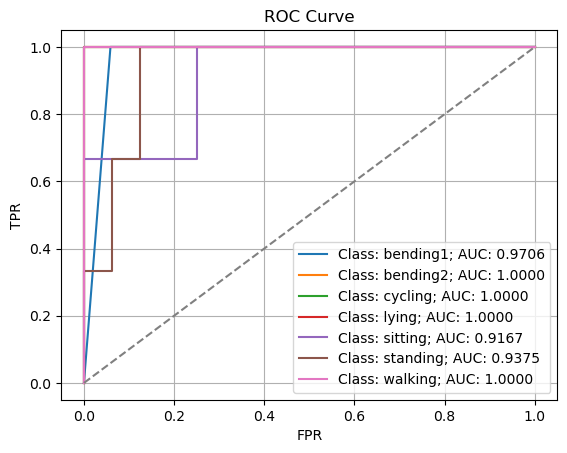

In [119]:
ROC_curve(nb_multinomial_test_y, nb_multinomial_test_predict, best_nb_multinomial_model)

When using a Naive Bayes' classifier, while the score of Gaussian is 0.8846, the score of Multinomail is 0.8274, which is lower than the Gaussian's. In addtion, ROC curves with testing data set significantly show that Gaussian is more accurate than the Multinomial.

### iii. Which method is better for multi-class classification in this problem?

The results of AUC of ROC curve with the test data show that the Naive Bayes' classifer using Gaussian is the best than any other.

# 3. ISLR, 4.8.3

Suppose that there are $K$ classes, and that if an observation belongs to the $k$th class, then $X$ comes from a single-dimensional normal distribution:

$$
X \sim N(\mu_k, \sigma_k^2)
$$

A density function for the single-dimensional normal distribution is:

$$
f(x|\mu_k, \sigma_k^2) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp\left(-\frac{(x-\mu_k)^2}{2\sigma_k^2}\right)
$$

Prove that Bayes classifier is not linear:

The Bayes classifier chooses the class $k$ for which the posterior probability $P(C_k | X)$ is maximized. The posterior probability is proportional to:

$$
P(C_k | X) \propto P(X | C_k) \cdot P(C_k)
$$

Using normal density, ignoring constant, the log(the posterior probability) is,:

$$
\log P(X | C_k) = -\frac{(X - \mu_k)^2}{2\sigma_k^2} - \log(\sigma_k)
$$

To classify, we compare the log posteriors for different classes:

$$
\log P(X | C_k) - \log P(X | C_j) = -\frac{(X - \mu_k)^2}{2\sigma_k^2} + \frac{(X - \mu_j)^2}{2\sigma_j^2} + \log\left(\frac{\sigma_j}{\sigma_k}\right)
$$

Quadratic:

1. The decision boundary occurs when:

$$
\log P(X | C_k) = \log P(X | C_j)
$$

2. Expanding the squared terms:

$$
\frac{(X - \mu_k)^2}{\sigma_k^2} - \frac{(X - \mu_j)^2}{\sigma_j^2} = \text{constant}
$$

This expression includes quadratic in $X$, meaning the decision boundary is quadratic in $X$, which is not linear.

Therefore, the Bayes classifier in this case is quadratic because the decision rule involves $X^2$ terms.

# 3. ISLR, 4.8.7

Based on the question:  
- $\pi_1 = 0.8$, $\pi_2 = 0.2$
- Dividends company: mean: $\mu_1 = 10$ and variance: $\sigma_1^2 = 36$.
- Non-dividends compnay: mean: $\mu_2 = 0$ and variance: $\sigma_2^2 = 36$.

Given $X = 4$, compute the probability that the company will issue dividend this year, i.e., $P(Y = \text{Yes} | X = 4)$.

**Bayes' theorem** can compute the posterior probability:

$$
P(Y = \text{Yes} | X = 4) = \frac{\pi_1 f_1(4)}{\pi_1 f_1(4) + \pi_2 f_2(4)}
$$

where:

- $\pi_1 = 0.8$ (the prior probability of issuing a dividend)
- $\pi_2 = 0.2$ (the prior probability of not issuing a dividend)
- $f_1(x)$ is the probability density function for $X$ given that a company issued a dividend, which is a normal distribution with mean $\mu_1 = 10$ and variance $\sigma_1^2 = 36$
- $f_2(x)$ is the probability density function for $X$ given that a company did not issue a dividend, which is a normal distribution with mean $\mu_2 = 0$ and variance $\sigma_2^2 = 36$

The probability density function for a normal distribution is:

$$
f_i(x) = \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left(-\frac{(x - \mu_i)^2}{2\sigma_i^2}\right)
$$

 
For $f_1(4)$ and $f_2(4)$, we plug in the values:

- $f_1(4) = \frac{1}{\sqrt{2\pi \cdot 36}} \exp\left(-\frac{(4 - 10)^2}{2 \cdot 36}\right)$
- $f_2(4) = \frac{1}{\sqrt{2\pi \cdot 36}} \exp\left(-\frac{(4 - 0)^2}{2 \cdot 36}\right)$

Now applying Bayes' theorem:

$$
P(Y = \text{Yes} | X = 4) = \frac{0.8 \cdot \exp\left(-\frac{(4 - 10)^2}{2 \cdot 36}\right)}{0.8 \cdot \exp\left(-\frac{(4 - 10)^2}{2 \cdot 36}\right) + 0.2 \cdot \exp\left(-\frac{(4 - 0)^2}{2 \cdot 36}\right)}
$$


Simplifying the exponents:

$$
P(Y = \text{Yes} | X = 4) = \frac{0.8 \cdot \exp\left(-\frac{36}{72}\right)}{0.8 \cdot \exp\left(-\frac{36}{72}\right) + 0.2 \cdot \exp\left(-\frac{16}{72}\right)}
$$

After evaluating the expressions, we get:

$$
P(Y = \text{Yes} | X = 4) \approx 0.7519
$$

Thus, the probability that the company will issue a dividend this year given that its percentage profitat its percentage profit last year was $X = 4$ is approximately **75.19%**.
